In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('Employee_Profile_IT.csv')
# Drop the 'Exit Date' column
df.drop(columns=['Exit Date'], inplace=True)
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
0,E04888,Elijah Henry,Manager,IT,Corporate,Male,Caucasian,32.0,1/3/2014,127148.0,0.1,United States,Miami,7,16,Master's,1
1,E02216,Caleb Marquez,IT Systems Architect,IT,Research & Development,Male,Latino,29.0,10/15/2019,66819.0,0.0,Brazil,Rio de Janerio,7,16,Bachelor's,2
2,E02861,Daniel Perry,Enterprise Architect,IT,Research & Development,Male,Caucasian,62.0,4/15/2001,80921.0,0.0,United States,Columbus,5,16,Bachelor's,1
3,E03223,Ethan Joseph,IT Coordinator,IT,Research & Development,Male,Caucasian,45.0,5/28/2018,49219.0,0.0,United States,Columbus,8,16,PhD,3
4,E02770,Liliana Do,Service Desk Analyst,IT,Manufacturing,Female,Asian,30.0,3/29/2019,86774.0,0.0,China,Chengdu,8,16,Master's,0


Clean Dataset

Handling missing values

In [3]:
df.isnull().sum()

EEID                    0
Full Name               1
Job Title               1
Department              0
Business Unit           0
Gender                  0
Ethnicity               2
Age                     3
Hire Date               3
Annual Salary           3
Bonus %                 0
Country                 1
City                    1
EmploymentRating        0
DaysOfAbsence           0
EducationLevel          0
CertificationsEarned    0
dtype: int64

In [4]:
null_records = df[df.isnull().any(axis=1)]
null_records

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
31,E03538,Gabriel Holmes,Enterprise Architect,IT,Research & Development,Male,Caucasian,NaN,11/4/2010,92952.0,0.00,United States,Seattle,10,14,Bachelor's,0
33,E03131,Ezekiel Reed,Sr. Manger,IT,Manufacturing,Male,Caucasian,37.0,NaN,NaN,0.00,NaN,NaN,9,14,Master's,2
84,E00816,Skylar Watson,Network Architect,IT,Speciality Products,Female,NaN,NaN,NaN,NaN,0.00,United States,Phoenix,9,10,Bachelor's,0
98,E02855,Piper Cheng,Enterprise Architect,IT,Manufacturing,Female,NaN,NaN,NaN,NaN,0.00,United States,Miami,9,9,Bachelor's,3
109,E04116,David Barnes,NaN,IT,Corporate,Male,Caucasian,64.0,11/3/2013,186503.0,0.24,United States,Columbus,8,8,Bachelor's,2
173,E03567,NaN,Technical Architect,IT,Research & Development,Male,Latino,51.0,4/15/2008,86431.0,0.00,United States,Columbus,8,3,Bachelor's,4


In [5]:
# Create a copy to work on
it_df = df.copy()

# Calculate medians for numerical columns
median_age = it_df['Age'].median()
median_salary = it_df['Annual Salary'].median()

# Fill NaN values 
it_df['Age'] = it_df['Age'].fillna(median_age)
it_df['Annual Salary'] = it_df['Annual Salary'].fillna(median_salary)


# Calculate modes for categorical columns
mode_ethnicity = it_df['Ethnicity'].mode()[0]
mode_country = it_df['Country'].mode()[0]

# Fill NaN values 
it_df['Ethnicity'] = it_df['Ethnicity'].fillna(mode_ethnicity)
it_df['Country'] = it_df['Country'].fillna(mode_country)

# drop any remaining rows with null values
it_df = it_df.dropna()

# Verify the result (no more nulls in these columns)
print("Null values after imputation:")
print(it_df.isnull().sum())



Null values after imputation:
EEID                    0
Full Name               0
Job Title               0
Department              0
Business Unit           0
Gender                  0
Ethnicity               0
Age                     0
Hire Date               0
Annual Salary           0
Bonus %                 0
Country                 0
City                    0
EmploymentRating        0
DaysOfAbsence           0
EducationLevel          0
CertificationsEarned    0
dtype: int64


Encoding

In [6]:
# Drop the EEID, department, Full Name column
drop_columns = ['Full Name', 'EEID', 'Department']
it_df = it_df.drop(columns=[col for col in drop_columns if col in it_df.columns])

it_df.head()

,Job Title,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
0,Manager,Corporate,Male,Caucasian,32.0,1/3/2014,127148.0,0.1,United States,Miami,7,16,Master's,1
1,IT Systems Architect,Research & Development,Male,Latino,29.0,10/15/2019,66819.0,0.0,Brazil,Rio de Janerio,7,16,Bachelor's,2
2,Enterprise Architect,Research & Development,Male,Caucasian,62.0,4/15/2001,80921.0,0.0,United States,Columbus,5,16,Bachelor's,1
3,IT Coordinator,Research & Development,Male,Caucasian,45.0,5/28/2018,49219.0,0.0,United States,Columbus,8,16,PhD,3
4,Service Desk Analyst,Manufacturing,Female,Asian,30.0,3/29/2019,86774.0,0.0,China,Chengdu,8,16,Master's,0


In [7]:
# Apply Label Encoding to categorical columns
from sklearn.preprocessing import LabelEncoder

# Create an instance of the encoder
le = LabelEncoder()

it_df['EducationLevel'] = le.fit_transform(it_df['EducationLevel'])

it_df.head()

,Job Title,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
0,Manager,Corporate,Male,Caucasian,32.0,1/3/2014,127148.0,0.1,United States,Miami,7,16,2,1
1,IT Systems Architect,Research & Development,Male,Latino,29.0,10/15/2019,66819.0,0.0,Brazil,Rio de Janerio,7,16,0,2
2,Enterprise Architect,Research & Development,Male,Caucasian,62.0,4/15/2001,80921.0,0.0,United States,Columbus,5,16,0,1
3,IT Coordinator,Research & Development,Male,Caucasian,45.0,5/28/2018,49219.0,0.0,United States,Columbus,8,16,3,3
4,Service Desk Analyst,Manufacturing,Female,Asian,30.0,3/29/2019,86774.0,0.0,China,Chengdu,8,16,2,0


In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns
categorical_columns = ['Gender', 'Ethnicity', 'Country', 'City', 'Business Unit']

# Create the encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_array = encoder.fit_transform(it_df[categorical_columns])

# Get feature names with prefixes (City_Seattle, Business Unit_Speciality Products)
encoded_columns = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with these columns
one_hot_df = pd.DataFrame(encoded_array, columns=encoded_columns, index=it_df.index)

# Drop original categorical columns and concatenate
df_sklearn_encoded = pd.concat([it_df.drop(categorical_columns, axis=1), one_hot_df], axis=1)

df_sklearn_encoded.head()


,Job Title,Age,Hire Date,Annual Salary,Bonus %,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned,Gender_Female,...,City_Phoenix,City_Rio de Janerio,City_Sao Paulo,City_Seattle,City_Shanghai,Business Unit_Corporate,Business Unit_Manufacturing,Business Unit_Research & Development,Business Unit_Speciality Products,Business Unit_Technology
0,Manager,32.0,1/3/2014,127148.0,0.1,7,16,2,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,IT Systems Architect,29.0,10/15/2019,66819.0,0.0,7,16,0,2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Enterprise Architect,62.0,4/15/2001,80921.0,0.0,5,16,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,IT Coordinator,45.0,5/28/2018,49219.0,0.0,8,16,3,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Service Desk Analyst,30.0,3/29/2019,86774.0,0.0,8,16,2,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Part 2: Exit-Date Prediction 

In [9]:
exit_date_df = pd.read_csv('Employee_Exit.csv')
exit_date_df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E65246,Sarah Moses,Technical Architect,Finance,Customer Support,Female,Black,56,06/18/2008,"$96,729",15%,India,Bangalore,01/03/2013
1,E42782,Eric Smith,Engineer,Finance,Manufacturing,Female,Caucasian,46,11/24/2013,"$98,803",20%,China,Chongqing,01/04/2022
2,E25474,Kathryn Clark,Director,Finance,Sales,Female,Hispanic,27,03/04/2004,"$141,682",10%,Canada,Toronto,04/19/2012
3,E14123,Danielle Hill,Engineer,Marketing,Customer Support,Female,Hispanic,52,01/23/1994,"$184,311",0%,Germany,Berlin,06/28/2003
4,E47811,Kristi Davis,Engineer,Marketing,Research & Development,Male,Caucasian,52,07/09/1996,"$89,195",15%,United States,Chicago,08/21/2004


In [10]:
# check for null values
exit_date_df.isnull().sum()

EEID             0
Full Name        0
Job Title        0
Department       0
Business Unit    0
Gender           0
Ethnicity        0
Age              0
Hire Date        0
Annual Salary    0
Bonus %          0
Country          0
City             0
Exit Date        0
dtype: int64

In [11]:
# drop unnecessary columns
exit_date_df = exit_date_df.drop(columns=['Full Name', 'EEID'])
exit_date_df.head()

# Convert date columns to datetime objects
exit_date_df['Hire Date'] = pd.to_datetime(exit_date_df['Hire Date'])
# 'coerce' will turn any unparseable dates into 'NaT' (Not a Time)
exit_date_df['Exit Date'] = pd.to_datetime(exit_date_df['Exit Date'], errors='coerce')

# Remove '$' and ',' from Annual Salary and convert to a number (float)
exit_date_df['Annual Salary'] = exit_date_df['Annual Salary'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Remove '%' from Bonus % and convert to a float between 0 and 1
exit_date_df['Bonus %'] = exit_date_df['Bonus %'].replace({'%': ''}, regex=True).astype(float) / 100.0

# Calculate 'Tenure' in years
exit_date_df['Tenure'] = (exit_date_df['Exit Date'] - exit_date_df['Hire Date']).dt.days / 365.25
exit_date_df.head()


,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Tenure
0,Technical Architect,Finance,Customer Support,Female,Black,56,2008-06-18,96729.0,0.15,India,Bangalore,2013-01-03,4.544832
1,Engineer,Finance,Manufacturing,Female,Caucasian,46,2013-11-24,98803.0,0.20,China,Chongqing,2022-01-04,8.112252
2,Director,Finance,Sales,Female,Hispanic,27,2004-03-04,141682.0,0.10,Canada,Toronto,2012-04-19,8.125941
3,Engineer,Marketing,Customer Support,Female,Hispanic,52,1994-01-23,184311.0,0.00,Germany,Berlin,2003-06-28,9.426420
4,Engineer,Marketing,Research & Development,Male,Caucasian,52,1996-07-09,89195.0,0.15,United States,Chicago,2004-08-21,8.117728


Prepare Data for Modeling

In [12]:
# Select the features to be used for prediction.
features_to_use = [
    'Age', 'Annual Salary', 'Bonus %', 'Department', 'Business Unit',
    'Gender', 'Ethnicity', 'Country', 'City'
]
target_variable = 'Tenure'

X = exit_date_df[features_to_use] # features
y = exit_date_df[target_variable]  # target

# Convert categorical features into a numerical format using one-hot encoding.
exit_date_df = pd.get_dummies(X, drop_first=True)

exit_date_df.head()

,Age,Annual Salary,Bonus %,Department_HR,Department_IT,Department_Marketing,Department_Operations,Business Unit_Manufacturing,Business Unit_Research & Development,Business Unit_Sales,...,Ethnicity_Other,Country_China,Country_Germany,Country_India,Country_United States,City_Berlin,City_Chicago,City_Chongqing,City_Seattle,City_Toronto
0,56,96729.0,0.15,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,46,98803.0,0.20,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
2,27,141682.0,0.10,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,52,184311.0,0.00,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,52,89195.0,0.15,False,False,True,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False


In [13]:
exit_date_df.columns

Index(['Age', 'Annual Salary', 'Bonus %', 'Department_HR', 'Department_IT',
       'Department_Marketing', 'Department_Operations',
       'Business Unit_Manufacturing', 'Business Unit_Research & Development',
       'Business Unit_Sales', 'Business Unit_Speciality Products',
       'Gender_Male', 'Ethnicity_Black', 'Ethnicity_Caucasian',
       'Ethnicity_Hispanic', 'Ethnicity_Other', 'Country_China',
       'Country_Germany', 'Country_India', 'Country_United States',
       'City_Berlin', 'City_Chicago', 'City_Chongqing', 'City_Seattle',
       'City_Toronto'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Split Data into Training , Testing  Sets (80/20)
X_train, X_temp, y_train, y_temp = train_test_split(exit_date_df, y, test_size=0.4, random_state=42)

# split the temporary set (40%) into a validation set and a test set (20% / 20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set has {X_train.shape[0]} samples.")
print(f"Validation set has {X_val.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

# Train the Machine Learning Model
print("\nTraining the Random Forest Regressor model...")
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Evaluate on the VALIDATION Set
print("\nEvaluating model on VALIDATION data")
val_predictions = model.predict(X_val)
val_mae = mean_absolute_error(y_val, val_predictions)
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))

print(f"Validation Mean Absolute Error (MAE): {val_mae:.2f} days")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse:.2f} days")

# Evaluate on the TEST Set
print("\nEvaluating model on TEST data")
test_predictions = model.predict(X_test)
test_mae = mean_absolute_error(y_test, test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print(f"Test Mean Absolute Error (MAE): {test_mae:.2f} days")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f} days")

Training set has 1200 samples.
Validation set has 400 samples.
Testing set has 400 samples.

Training the Random Forest Regressor model...

Evaluating model on VALIDATION data
Validation Mean Absolute Error (MAE): 2.37 days
Validation Root Mean Squared Error (RMSE): 2.78 days

Evaluating model on TEST data
Test Mean Absolute Error (MAE): 2.41 days
Test Root Mean Squared Error (RMSE): 2.79 days


In [15]:
from joblib import dump

# Save the trained model to a file
dump(model, 'exit_date_predictor.joblib')
print("Model saved")

Model saved


Predicte Employee_Profile_IT exit date

In [16]:
import pandas as pd
import joblib

# Load model
model = joblib.load("exit_date_predictor.joblib")

# Get expected feature names from the model
expected_features = model.feature_names_in_

# Copy current dataset
X = df_sklearn_encoded.copy()

# Add missing columns as 0
for col in expected_features:
    if col not in X.columns:
        X[col] = 0

# Reorder columns to match training
X = X[expected_features]

# Predict tenure
predicted_tenure = model.predict(X)

# Convert to days and add to Hire Date
predicted_days = (predicted_tenure * 365).astype(int)
X['Predicted Exit Date'] = pd.to_datetime(df_sklearn_encoded['Hire Date']) + pd.to_timedelta(predicted_days, unit='D')
X['Predicted Tenure (years)'] = predicted_tenure

X[['Predicted Tenure (years)', 'Predicted Exit Date']].head()


,Predicted Tenure (years),Predicted Exit Date
0,3.964928,2017-12-20
1,5.021821,2024-10-20
2,4.510609,2005-10-17
3,4.874278,2023-04-11
4,5.324052,2024-07-23


Append exit date to Employee_Profile_IT 

In [17]:
df_employee_profile_it = it_df.copy()

# add the new column
df_employee_profile_it["Predicted Exit Date"] = pd.to_datetime(df_sklearn_encoded['Hire Date']) + pd.to_timedelta(predicted_days, unit='D')

# show results
df_employee_profile_it.head()


,Job Title,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned,Predicted Exit Date
0,Manager,Corporate,Male,Caucasian,32.0,1/3/2014,127148.0,0.1,United States,Miami,7,16,2,1,2017-12-20
1,IT Systems Architect,Research & Development,Male,Latino,29.0,10/15/2019,66819.0,0.0,Brazil,Rio de Janerio,7,16,0,2,2024-10-20
2,Enterprise Architect,Research & Development,Male,Caucasian,62.0,4/15/2001,80921.0,0.0,United States,Columbus,5,16,0,1,2005-10-17
3,IT Coordinator,Research & Development,Male,Caucasian,45.0,5/28/2018,49219.0,0.0,United States,Columbus,8,16,3,3,2023-04-11
4,Service Desk Analyst,Manufacturing,Female,Asian,30.0,3/29/2019,86774.0,0.0,China,Chengdu,8,16,2,0,2024-07-23


Part 3: Bonus Percentage Prediction 

In [18]:
performance_df = pd.read_csv('Performance_Bonus.csv')
performance_df.head()

,PerformanceID,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned,Bouns
0,1,10,2,Bachelor's,5,33%
1,2,10,0,Master's,5,31%
2,3,4,10,Doctorate,4,34%
3,4,9,0,Doctorate,3,27%
4,5,2,13,Doctorate,1,37%


In [19]:
performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PerformanceID         1000 non-null   int64 
 1   EmploymentRating      1000 non-null   int64 
 2   DaysOfAbsence         1000 non-null   int64 
 3   EducationLevel        1000 non-null   object
 4   CertificationsEarned  1000 non-null   int64 
 5   Bouns                 1000 non-null   object
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [20]:
performance_df.isnull().sum()

PerformanceID           0
EmploymentRating        0
DaysOfAbsence           0
EducationLevel          0
CertificationsEarned    0
Bouns                   0
dtype: int64

In [21]:
# apply label encoding to EducationLevel
performance_df['EducationLevel'] = le.fit_transform(performance_df['EducationLevel'])
performance_df['Bouns'] = performance_df['Bouns'].replace({'%': ''}, regex=True).astype(float) / 100.0
performance_df.head()

,PerformanceID,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned,Bouns
0,1,10,2,0,5,0.33
1,2,10,0,2,5,0.31
2,3,4,10,1,4,0.34
3,4,9,0,1,3,0.27
4,5,2,13,1,1,0.37


Build LinearRegression Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

# Features and Target
X = performance_df[['EmploymentRating', 'DaysOfAbsence', 'EducationLevel', 'CertificationsEarned']]
y = performance_df['Bouns'] 

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# train the model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

# Save the trained model
joblib.dump(model, "bonus_predictor.joblib")
print("Model saved as bonus_predictor.joblib")


MAE: 0.10493912520363377
RMSE: 0.12086199789848494
Model saved as bonus_predictor.joblib


In [23]:
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Features + Target
X_it = df_employee_profile_it[['EmploymentRating', 'DaysOfAbsence', 'EducationLevel', 'CertificationsEarned']]
y_it = df_employee_profile_it['Bonus %']   

# Load the saved model 
loaded_model = joblib.load("bonus_predictor.joblib")

# Predict
df_employee_profile_it["Predicted_Bonus"] = loaded_model.predict(X_it)

# Evaluation Metrics
mae_it = mean_absolute_error(y_it, df_employee_profile_it["Predicted_Bonus"])
rmse_it = np.sqrt(mean_squared_error(y_it, df_employee_profile_it["Predicted_Bonus"]))

print("Evaluation for IT Employees Dataset:")
print(f"MAE : {mae_it:.4f}")
print(f"RMSE: {rmse_it:.4f}")

# Show sample of results
df_employee_profile_it.head()



Evaluation for IT Employees Dataset:
MAE : 0.1743
RMSE: 0.1820


,Job Title,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned,Predicted Exit Date,Predicted_Bonus
0,Manager,Corporate,Male,Caucasian,32.0,1/3/2014,127148.0,0.1,United States,Miami,7,16,2,1,2017-12-20,0.220097
1,IT Systems Architect,Research & Development,Male,Latino,29.0,10/15/2019,66819.0,0.0,Brazil,Rio de Janerio,7,16,0,2,2024-10-20,0.209146
2,Enterprise Architect,Research & Development,Male,Caucasian,62.0,4/15/2001,80921.0,0.0,United States,Columbus,5,16,0,1,2005-10-17,0.207744
3,IT Coordinator,Research & Development,Male,Caucasian,45.0,5/28/2018,49219.0,0.0,United States,Columbus,8,16,3,3,2023-04-11,0.224038
4,Service Desk Analyst,Manufacturing,Female,Asian,30.0,3/29/2019,86774.0,0.0,China,Chengdu,8,16,2,0,2024-07-23,0.222475


In [24]:
# count how many employees recived less that actual bonus than predicted bonus
count_less_bonus = (df_employee_profile_it['Bonus %'] < df_employee_profile_it['Predicted_Bonus']).sum()
print(f"Number of employees who received less bonus than predicted: {count_less_bonus}")

Number of employees who received less bonus than predicted: 201


Build Classificaton model

In [25]:
# Create the new classification column 'Got_Bonus'
# Bounds greater than 0 get a 1, otherwise 0
df_employee_profile_it['Got_Bonus'] = np.where(df_employee_profile_it['Bonus %'] > 0, 1, 0)

# Display the original 'Bouns' and the new 'Got_Bonus' column for the first 10 rows
print(df_employee_profile_it[['Bonus %', 'Got_Bonus']].head(10))
print("\n")


# Display the count of each class to see the balance
class_counts = df_employee_profile_it['Got_Bonus'].value_counts()
print(class_counts)
print("\n")

   Bonus %  Got_Bonus
0     0.10          1
1     0.00          0
2     0.00          0
3     0.00          0
4     0.00          0
5     0.00          0
6     0.08          1
7     0.00          0
8     0.00          0
9     0.00          0


Got_Bonus
0    153
1     73
Name: count, dtype: int64




Accuracy: 58.70%
Confusion Matrix:
[[23  8]
 [11  4]]


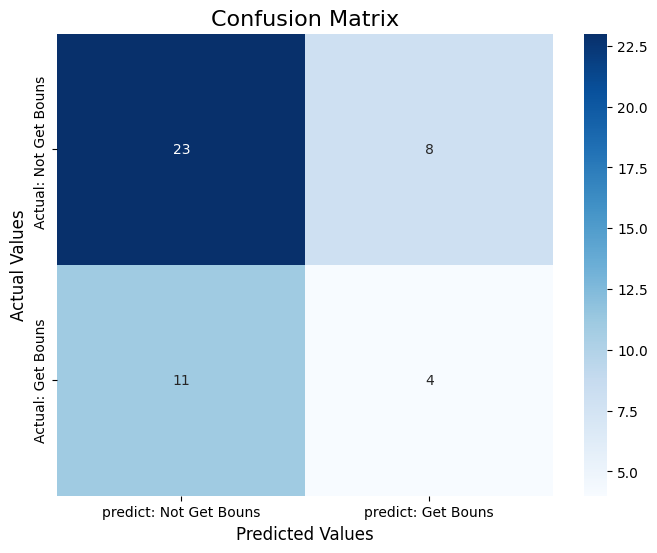


Classification Report:
                   precision    recall  f1-score   support

Not Get Bouns (0)       0.68      0.74      0.71        31
    Get Bouns (1)       0.33      0.27      0.30        15

         accuracy                           0.59        46
        macro avg       0.50      0.50      0.50        46
     weighted avg       0.56      0.59      0.57        46



In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
# Define Features (X) and the new Target (y) 
features = ['EmploymentRating', 'DaysOfAbsence', 'EducationLevel', 'CertificationsEarned']
X = df_employee_profile_it[features]
y = df_employee_profile_it['Got_Bonus'] # new target variable (0 or 1)


# Split data into Training and Testing sets 
# use 'stratify=y' to ensure both train and test sets have a similar proportion of 0s and 1s.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


# Build and Train the RandomForestClassifier Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the Model on the Test Data
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['predict: Not Get Bouns', 'predict: Get Bouns'],
            yticklabels=['Actual: Not Get Bouns ', 'Actual: Get Bouns'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Values', fontsize=12)
plt.xlabel('Predicted Values', fontsize=12)
plt.show()

#Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Get Bouns (0)', 'Get Bouns (1)']))

